In [17]:
import cv2
import os
import random
rand = random.Random()
import json
from PIL import Image
from pylab import *
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

## 1. Fetch an image and data from VGG formatted JSON annotations:

In [9]:
# Load the JSON file
with open('cat_dog_annotations.json') as f:
    data_json = json.load(f)

In [10]:
for img_id, img_data in data_json['_via_img_metadata'].items():
    # fetch the image
    filename = img_data['filename']
    image = Image.open(filename)

## 2. Load that image

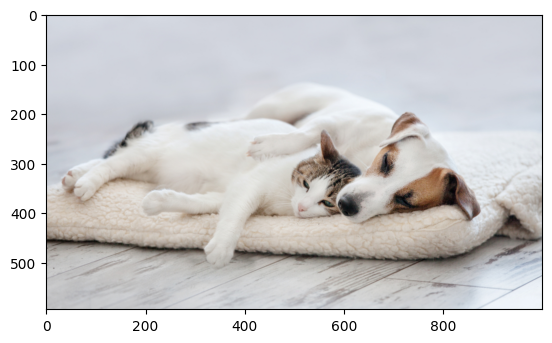

In [11]:
fig, ax = plt.subplots()
ax.imshow(image)

## 3. Resize that image from resize scale percentage 60 to 100 randomly.

In [20]:
#Set the scaling factor randomly between 0.6 and 1.0
img = cv2.imread('7.jpeg')
import random
rand = random.Random()
scale = rand.uniform(0.6, 1.0)

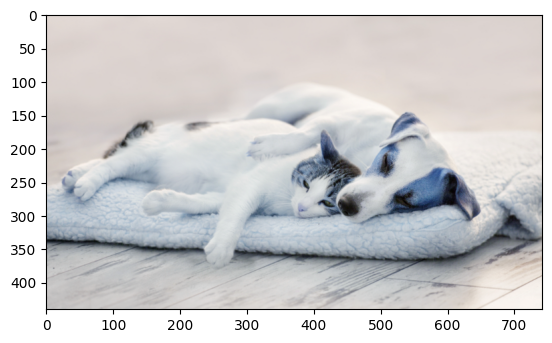

In [21]:
# Calculate the new size of the image
height, width = img.shape[:2]
new_height = int(height * scale)
new_width = int(width * scale)

# Resize the image
resized_img = cv2.resize(img, (new_width, new_height))

# Display the resized image
imshow(resized_img)

True

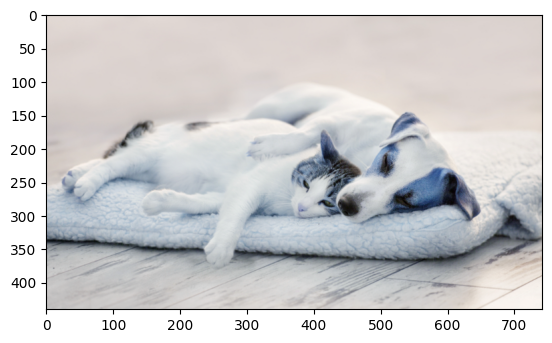

In [22]:
# Generate a random scale factor between 0.6 and 1.0
scale_factor = random.uniform(0.1, 0.3)

# Resize the image with the random scale factor
resized_img_2 = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
imshow(resized_img)
# Save the resized image
cv2.imwrite('resized_image.jpg', resized_img_2)

## 4.Add random brightness to that resized image.

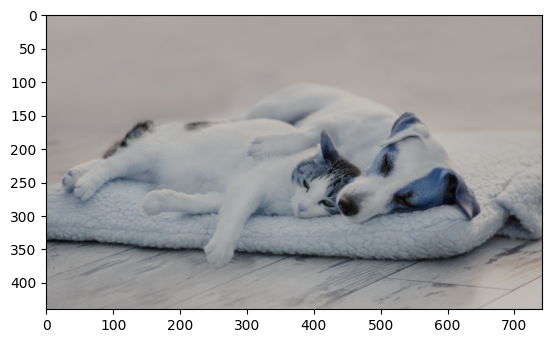

In [23]:
# Add random brightness
brightness = np.random.uniform(0.75, 1.5)
img_brighter = cv2.convertScaleAbs(resized_img, alpha=brightness)
imshow(img_brighter)

## 5. Rotate that brighter image on an angle n. Don't forget to adjust bounding boxes according to the angle.

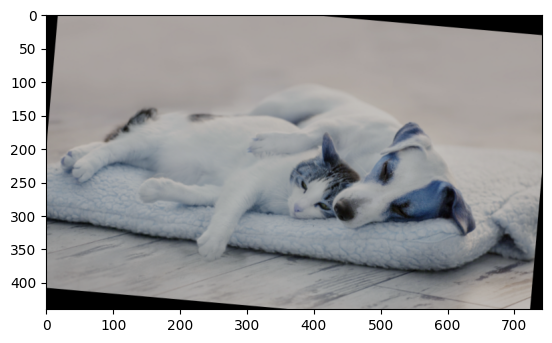

In [29]:
# Rotate image

M = cv2.getRotationMatrix2D((resized_img.shape[1]/2, resized_img.shape[0]/2), angle, 1)
img_rotated = cv2.warpAffine(img_brighter, M, (resized_img.shape[1], resized_img.shape[0]))
imshow(img_rotated)

## 7. Repeat step 3 to 6 for angles 0, 5, 10, 15, 20, ....., 350 and 355

In [44]:
import random
rand = random.Random()
scale = rand.uniform(0.6, 1.0)

In [46]:
for angle in range(0, 360, 5):
    #step 3
    height, width = img.size
    new_height = int(height * scale)
    new_width = int(width * scale)

    # Resize the image
    resized_img = cv2.resize(img, (new_width, new_height))
    
    # For step 4
    # Add random brightness
    brightness = np.random.uniform(0.75, 1.5)
    img_brighter = cv2.convertScaleAbs(resized_img, alpha=brightness)
    
    # For step 6
    M = cv2.getRotationMatrix2D((resized_img.shape[1]/2, resized_img.shape[0]/2), angle, 1)
    img_rotated = cv2.warpAffine(img_brighter, M, (resized_img.shape[1], resized_img.shape[0]))

## 8. Repeat step 1 to 7 for all remaining images too

In [ ]:
for img_id, img_data in data_json['_via_img_metadata'].items():
    # fetch the image
    filename = img_data['filename']
    image = Image.open(filename)
    for angle in range(0, 360, 5):
        #step 3
        height, width = img.size
        new_height = int(height * scale)
        new_width = int(width * scale)

        # Resize the image
        resized_img = cv2.resize(img, (new_width, new_height))
    
        # For step 4
        # Add random brightness
        brightness = np.random.uniform(0.75, 1.5)
        img_brighter = cv2.convertScaleAbs(resized_img, alpha=brightness)
    
        # For step 6
        M = cv2.getRotationMatrix2D((resized_img.shape[1]/2, resized_img.shape[0]/2), angle, 1)
        img_rotated = cv2.warpAffine(img_brighter, M, (resized_img.shape[1], resized_img.shape[0]))
        
        #  Save the  image
        img_name = "image_{}_{}.jpg".format(img_data["filename"], angle)
        img_path_new = "new_images/{}".format(img_name)
        cv2.imwrite(img_path_new, img_rotated)
    